In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [5]:
pre_owned = pd.read_csv('cars_sampled.csv')

In [6]:
pre_owned.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [7]:
col_list=[col for col in pre_owned.columns]
print('Columns present are  - \n',col_list)
print('\nNulls present :\n',pre_owned.isna().sum())

Columns present are  - 
 ['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen']

Nulls present :
 dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64


In [8]:
print('Count of datatypes:\n',pre_owned.dtypes.value_counts())

Count of datatypes:
 object    13
int64      6
dtype: int64


In [9]:
for num in range(len(col_list)):
    print('Unique items in column  - {}'.format(col_list[num]))
    print(pd.unique(pre_owned[pre_owned.columns[num]]),'\n')

Unique items in column  - dateCrawled
['30/03/2016 13:51' '7/3/2016 9:54' '1/4/2016 0:57' ... '24/03/2016 18:31'
 '17/03/2016 6:32' '20/03/2016 8:52'] 

Unique items in column  - name
['Zu_verkaufen' 'Volvo_XC90_2.4D_Summum' 'Volkswagen_Touran' ...
 '[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift___Xenon_evtl._Cabrio'
 'Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten'
 'Chevrolet_Matiz_1.Hd_TÜV11/2017'] 

Unique items in column  - seller
['private' 'commercial'] 

Unique items in column  - offerType
['offer' 'request'] 

Unique items in column  - price
[  4450  13299   3200 ...  24301  36399 175000] 

Unique items in column  - abtest
['test' 'control'] 

Unique items in column  - vehicleType
['limousine' 'suv' 'bus' 'small car' 'station wagon' 'coupe' nan 'others'
 'cabrio'] 

Unique items in column  - yearOfRegistration
[2003 2005 2006 2008 1995 1996 1997 2001 2016 1999 1993 2002 1998 2017
 1992 1991 2000 2011 2004 2009 1979 2010 2007 1952 1972 1994 2013 2018
 2012 1989 2014 2015 1990 1988 

In [10]:
pd.set_option('display.float_format',lambda x: '%.3f' %x)
pd.set_option('display.max_columns',500)
print(pre_owned.describe())
print('\n')
print(pre_owned.describe(include='O'))

             price  yearOfRegistration   powerPS  kilometer  \
count    50001.000           50001.000 50001.000  50001.000   
mean      6559.865            2005.544   116.496 125613.688   
std      85818.470             122.992   230.568  40205.234   
min          0.000            1000.000     0.000   5000.000   
25%       1150.000            1999.000    69.000 125000.000   
50%       2950.000            2003.000   105.000 150000.000   
75%       7190.000            2008.000   150.000 150000.000   
max   12345678.000            9999.000 19312.000 150000.000   

       monthOfRegistration  postalCode  
count            50001.000   50001.000  
mean                 5.744   50775.217  
std                  3.711   25743.702  
min                  0.000    1067.000  
25%                  3.000   30559.000  
50%                  6.000   49504.000  
75%                  9.000   71404.000  
max                 12.000   99998.000  


           dateCrawled      name   seller offerType abtest ve

In [11]:
print('Before dropping duplicates and irrelevant columns/rows')
print(pre_owned.shape)

Before dropping duplicates and irrelevant columns/rows
(50001, 19)


In [12]:
pre_owned.drop_duplicates(keep='first',inplace=True)

In [13]:
print('After dropping duplicates and irrelevant columns/rows')
print(pre_owned.shape)

After dropping duplicates and irrelevant columns/rows
(49999, 19)


In [14]:
#dropping unnecessary columns

In [15]:
drop_cols=['name','dateCrawled','postalCode','lastSeen','dateCreated']
pre_owned=pre_owned.drop(columns=drop_cols,axis=1)

1000     6
1255     1
1500     2
1910    15
1928     1
        ..
7500     1
7800     1
8500     1
8888     2
9999     7
Name: yearOfRegistration, Length: 97, dtype: int64
Irrelevant data found  for year of registration 55 hence working range will be between 1940 and 2020


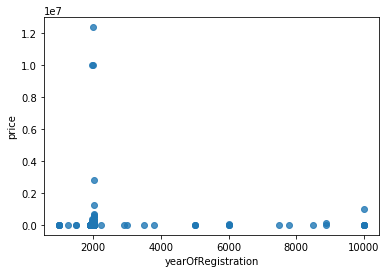

In [16]:
print(pre_owned['yearOfRegistration'].value_counts().sort_index())
print('Irrelevant data found  for year of registration',sum(pre_owned['yearOfRegistration']<1940)+sum(pre_owned['yearOfRegistration']>2020),'hence working range will be between 1940 and 2020')
sns.regplot(x='yearOfRegistration',y='price',fit_reg=False,data=pre_owned)


0           1451
1            172
2              1
3              1
5              4
            ... 
1250000        1
2795000        1
9999999        1
10010011       1
12345678       1
Name: price, Length: 2393, dtype: int64
Irrelevant data found  for price 1788 hence working range will be between 100 and 2000000


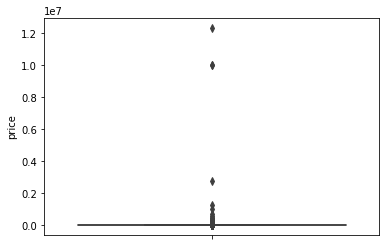

In [17]:
print(pre_owned['price'].value_counts().sort_index())
print('Irrelevant data found  for price',sum(pre_owned['price']<100)+sum(pre_owned['price']>2000000),'hence working range will be between 100 and 2000000')
sns.boxplot(y='price',data=pre_owned)


0        5605
1           3
2           2
3           2
4           4
         ... 
15033       1
16011       1
16312       1
19211       1
19312       1
Name: powerPS, Length: 460, dtype: int64
Irrelevant data found  for power ps 5752 hence working range will be between 10 and 500
AxesSubplot(0.125,0.125;0.227941x0.755)
AxesSubplot(0.398529,0.125;0.227941x0.755)
AxesSubplot(0.672059,0.125;0.227941x0.755)


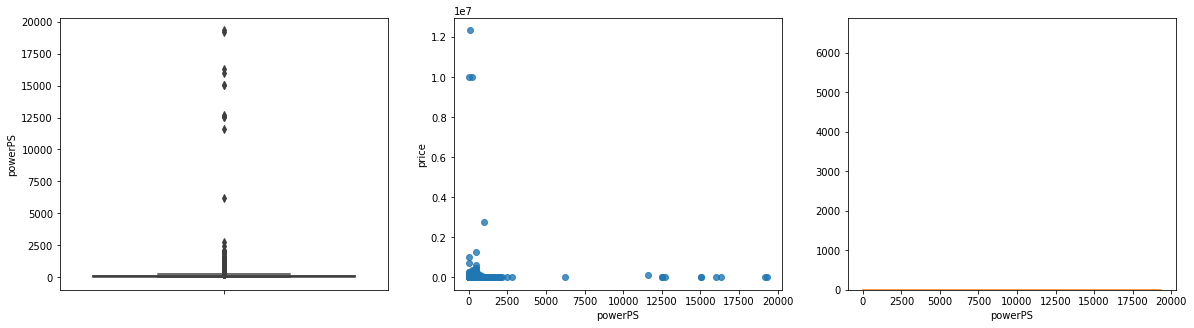

In [18]:
print(pre_owned['powerPS'].value_counts().sort_index())
print('Irrelevant data found  for power ps',sum(pre_owned['powerPS']<10)+sum(pre_owned['powerPS']>500),'hence working range will be between 10 and 500')
fig, axs = plt.subplots(figsize=(20,5),ncols=3)
print(sns.boxplot(y='powerPS',data=pre_owned,ax=axs[0]))
print(sns.regplot(x='powerPS',y='price',fit_reg=False,data=pre_owned,ax=axs[1]))
print(sns.distplot(pre_owned['powerPS'],bins=20,ax=axs[2]))

In [19]:
pre_owned=pre_owned[(pre_owned.yearOfRegistration>=1940)&(pre_owned.yearOfRegistration<=2020)
                    &(pre_owned.price>=100)&(pre_owned.price<=2000000)
                   &(pre_owned.powerPS>=10)&(pre_owned.powerPS<=500)]
pre_owned['Age']=(2020-pre_owned['yearOfRegistration'])+pre_owned['monthOfRegistration']/12
pre_owned=pre_owned.drop(columns=['yearOfRegistration','monthOfRegistration'],axis=1)

print('After dropping irrelevant data points, the number of entries left are :',pre_owned.shape)

After dropping irrelevant data points, the number of entries left are : (43181, 13)


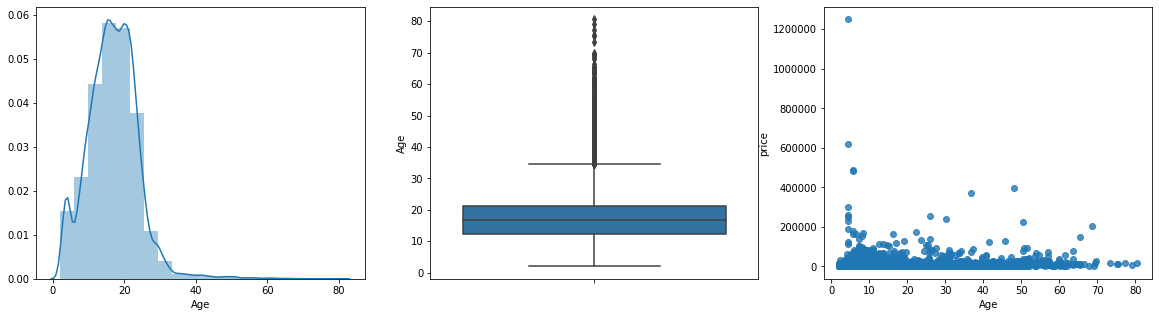

In [20]:
fig,axs=plt.subplots(figsize=(20,5),ncols=3)
sns.distplot(pre_owned['Age'],bins=20,ax=axs[0])
sns.boxplot(y=pre_owned['Age'],ax=axs[1])
sns.regplot(x='Age',y='price',fit_reg=False,scatter=True,data=pre_owned,ax=axs[2])

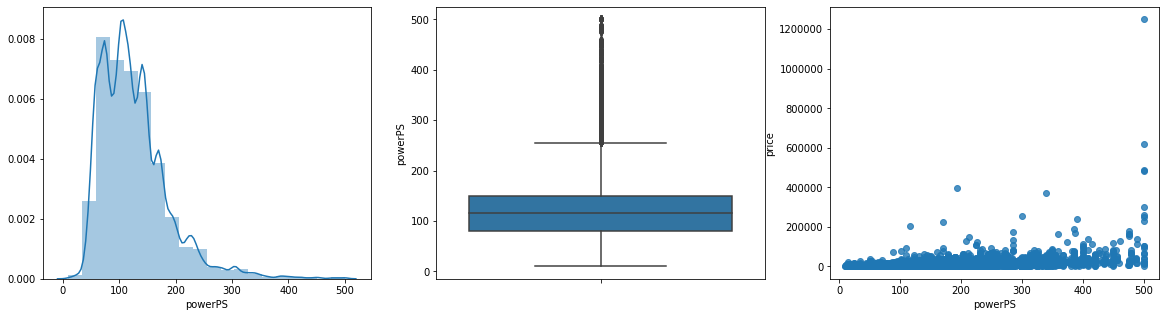

In [21]:
fig,axs=plt.subplots(figsize=(20,5),ncols=3)
sns.distplot(pre_owned['powerPS'],bins=20,ax=axs[0])
sns.boxplot(y=pre_owned['powerPS'],ax=axs[1])
sns.regplot(x='powerPS',y='price',fit_reg=False,scatter=True,data=pre_owned,ax=axs[2])

In [22]:
pre_owned.columns

Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage', 'Age'],
      dtype='object')

private       43180
commercial        1
Name: seller, dtype: int64


offer    43181
Name: offerType, dtype: int64
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


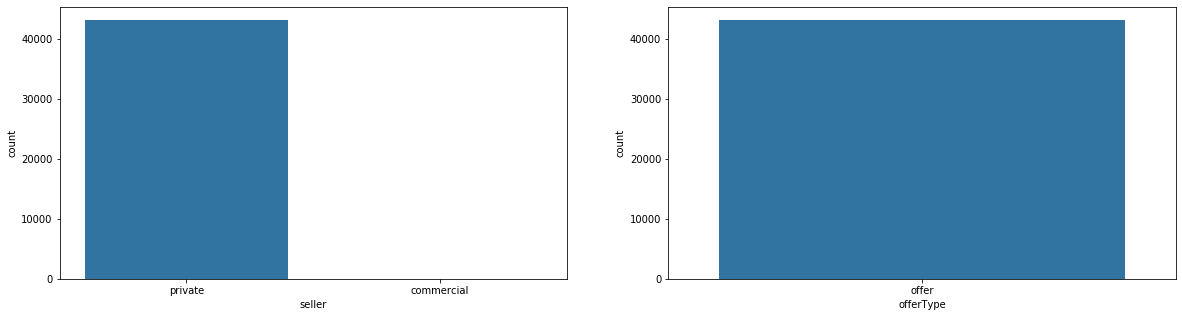

In [23]:
print(pre_owned['seller'].value_counts())
print('\n')
print(pre_owned['offerType'].value_counts())
fig,axs=plt.subplots(figsize=(20,5),ncols=2)
print(sns.countplot(x='seller',data=pre_owned,ax=axs[0]))
print(sns.countplot(x=pre_owned['offerType'],ax=axs[1]))

test       22349
control    20832
Name: abtest, dtype: int64
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


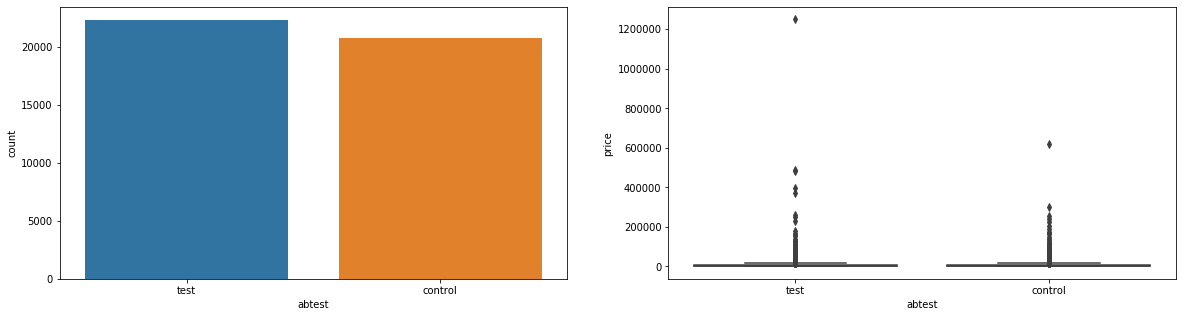

In [24]:
print(pre_owned['abtest'].value_counts())
fig,axs=plt.subplots(figsize=(20,5),ncols=2)
print(sns.countplot(x=pre_owned['abtest'],ax=axs[0]))
print(sns.boxplot(x='abtest',y='price',data=pre_owned,ax=axs[1]))

limousine        11874
small car         9358
station wagon     8155
bus               3624
cabrio            2814
coupe             2294
suv               1850
others             329
Name: vehicleType, dtype: int64
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


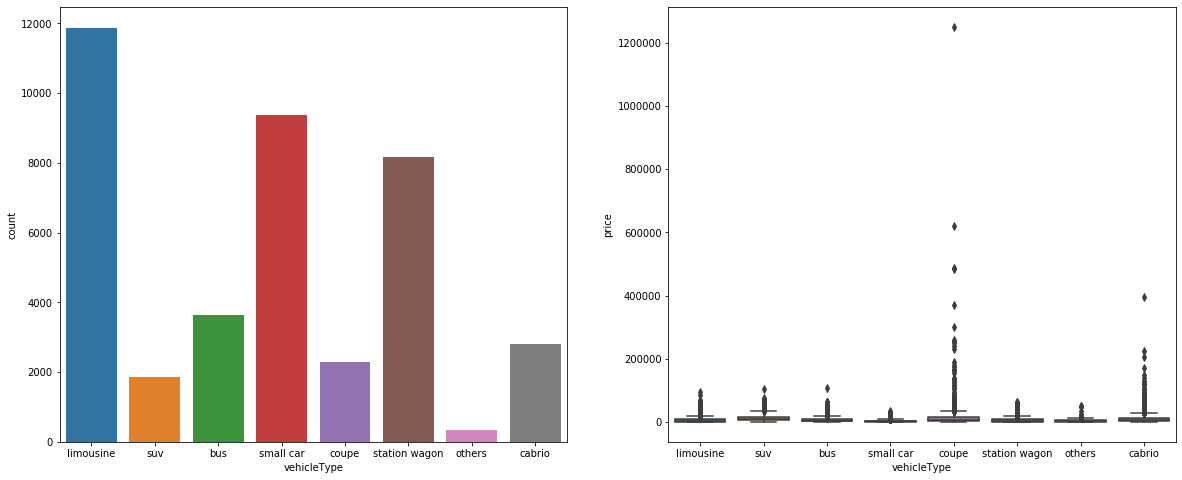

In [25]:
print(pre_owned['vehicleType'].value_counts())
fig,axs=plt.subplots(figsize=(20,8),ncols=2)
print(sns.countplot(x=pre_owned['vehicleType'],ax=axs[0]))
print(sns.boxplot(x='vehicleType',y='price',data=pre_owned,ax=axs[1]))

manual       32862
automatic     9522
Name: gearbox, dtype: int64
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


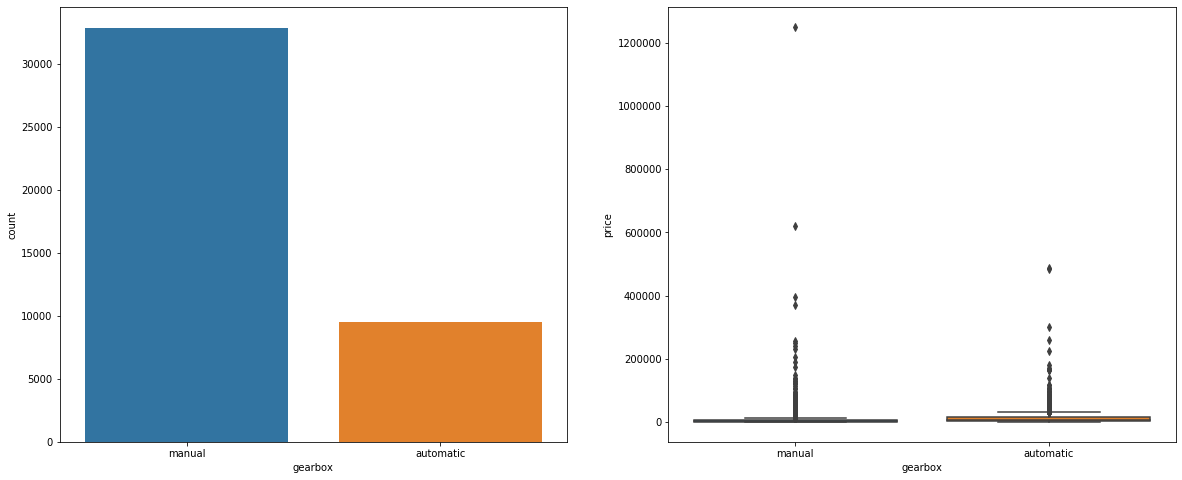

In [26]:
print(pre_owned['gearbox'].value_counts())
fig,axs=plt.subplots(figsize=(20,8),ncols=2)
print(sns.countplot(x=pre_owned['gearbox'],ax=axs[0]))
print(sns.boxplot(x='gearbox',y='price',data=pre_owned,ax=axs[1]))

golf        3513
others      2917
3er         2510
polo        1513
corsa       1402
astra       1286
a4          1240
passat      1212
c_klasse    1060
5er         1025
Name: model, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


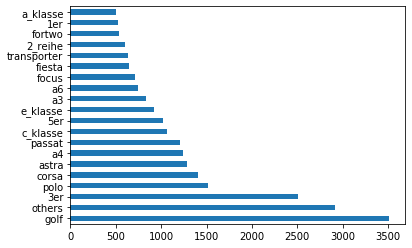

In [27]:
print(pre_owned['model'].value_counts().head(10))
print(pre_owned['model'].value_counts().head(20).plot.barh())



150000    27648
125000     4636
100000     1853
90000      1497
80000      1395
70000      1190
60000      1126
50000       940
40000       809
30000       726
20000       657
5000        493
10000       211
Name: kilometer, dtype: int64
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


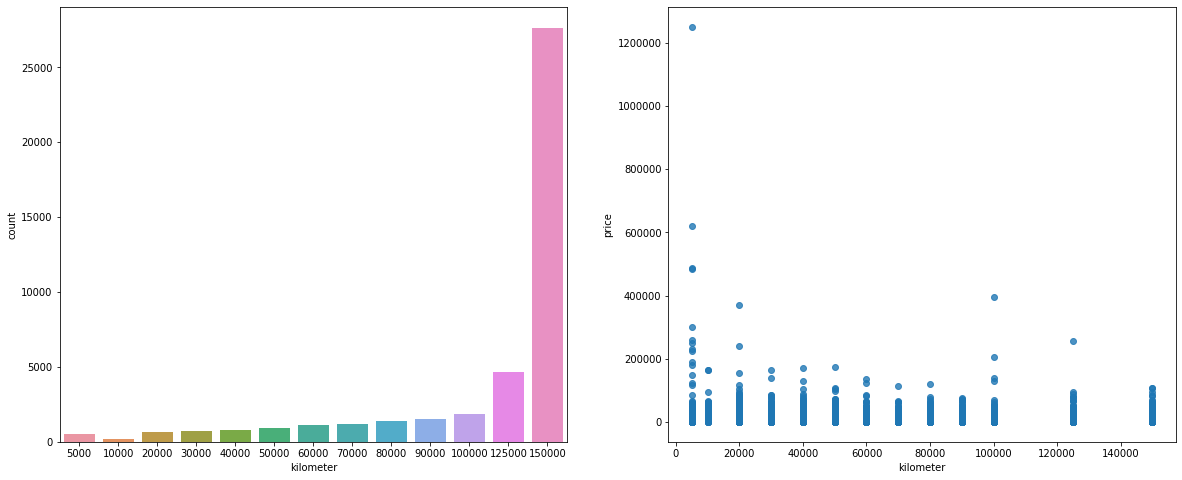

In [28]:
print(pre_owned['kilometer'].value_counts())
fig,axs=plt.subplots(figsize=(20,8),ncols=2)
print(sns.countplot(x=pre_owned['kilometer'],ax=axs[0]))
print(sns.regplot(x='kilometer',y='price',fit_reg=False,data=pre_owned,ax=axs[1]))

petrol     26725
diesel     13027
lpg          697
cng           71
hybrid        36
electro       10
other          6
Name: fuelType, dtype: int64
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


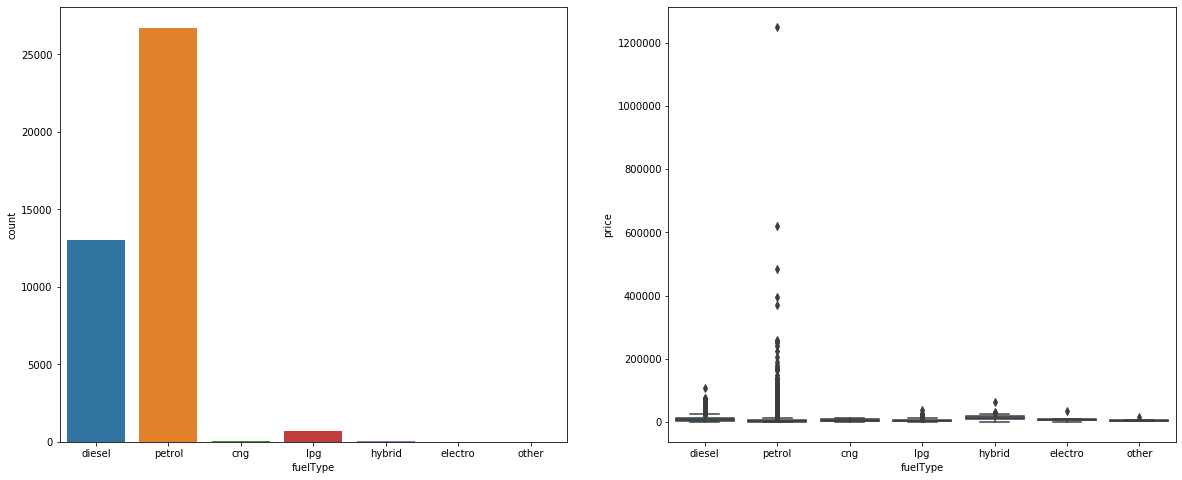

In [29]:
print(pre_owned['fuelType'].value_counts())
fig,axs=plt.subplots(figsize=(20,8),ncols=2)
print(sns.countplot(x=pre_owned['fuelType'],ax=axs[0]))
print(sns.boxplot(x='fuelType',y='price',data=pre_owned,ax=axs[1]))

volkswagen       9231
bmw              4922
opel             4532
mercedes_benz    4184
audi             4025
ford             2840
renault          1954
peugeot          1333
fiat             1001
seat              888
Name: brand, dtype: int64
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


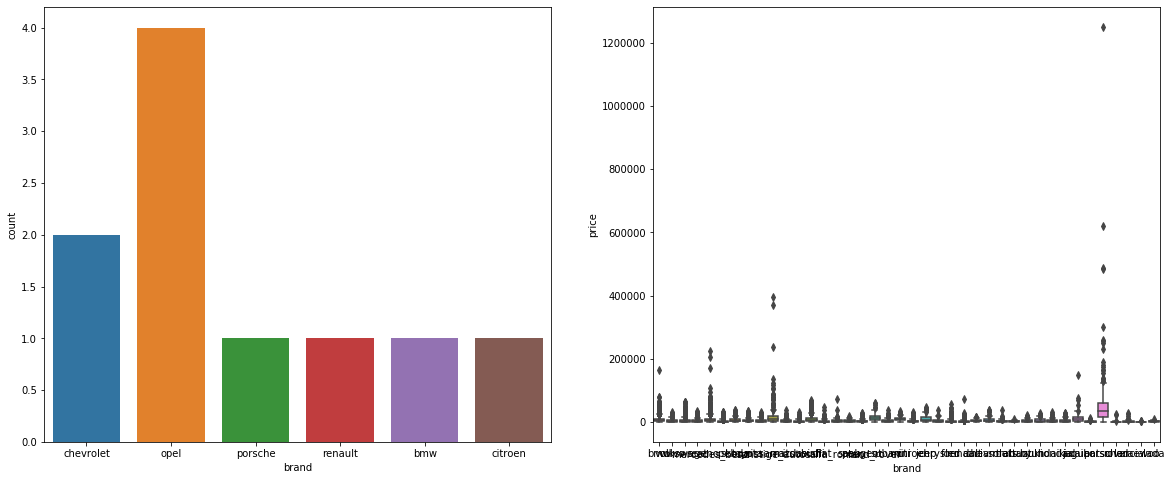

In [30]:
print(pre_owned['brand'].value_counts().head(10))
fig,axs=plt.subplots(figsize=(20,8),ncols=2)
print(sns.countplot(x=pre_owned['brand'].sort_index(ascending=False).head(10),ax=axs[0]))
print(sns.boxplot(x='brand',y='price',data=pre_owned,ax=axs[1]))

no     32862
yes     4018
Name: notRepairedDamage, dtype: int64
AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


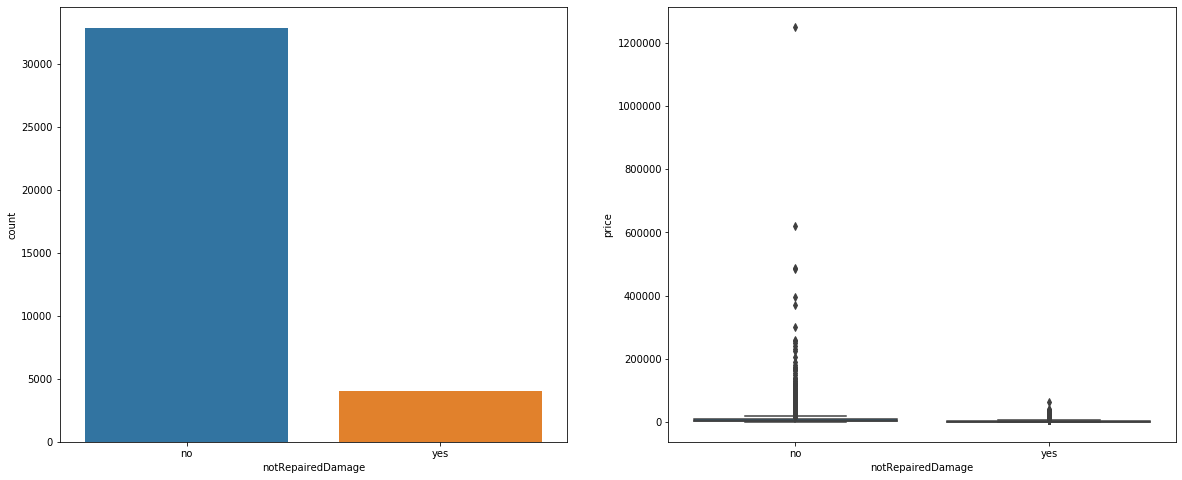

In [31]:
print(pre_owned['notRepairedDamage'].value_counts())
fig,axs=plt.subplots(figsize=(20,8),ncols=2)
print(sns.countplot(x=pre_owned['notRepairedDamage'],ax=axs[0]))
print(sns.boxplot(x='notRepairedDamage',y='price',data=pre_owned,ax=axs[1]))

In [32]:
pre_owned.drop(columns=['seller','abtest','offerType'],inplace=True)

In [33]:
final_pre_owned=pre_owned.dropna(axis=0)
final_pre_owned=pd.get_dummies(final_pre_owned,drop_first=True)
final_pre_owned.shape

(33244, 301)

In [34]:
X=final_pre_owned.drop(columns='price',axis=1)
y=final_pre_owned['price']
y=np.log(y)

In [35]:
print(X.shape,y.shape)


(33244, 300) (33244,)


In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [37]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(23270, 300) (9974, 300) (23270,) (9974,)


In [42]:
#creating a baseline model.
base_pred=np.mean(y_test)
base_pred=np.repeat(base_pred,len(y_test))
base_root_mean_squared_error=np.sqrt(mean_squared_error(y_test,base_pred))

1.1490571170123773

In [43]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
pred_value=linreg.predict(X_test)

In [51]:
pred_mean_square=mean_squared_error(y_test,pred_value)
root_pred_mean_square=np.sqrt(pred_mean_square)
print('The baseline RMSE is {}, while the MSE and RMSE of predicted values are {} and {}'.format(base_root_mean_squared_error,pred_mean_square,root_pred_mean_square))


The baseline RMSE is 1.1490571170123773, while the MSE and RMSE of predicted values are 0.30454104919303004 and 0.5518523798925126


In [54]:
#R-squared value

print('R-squared value for test - ',linreg.fit(X_train,y_train).score(X_test,y_test))
print('R-squared value for train - ',linreg.fit(X_train,y_train).score(X_train,y_train))

R-squared value for test -  0.7693451422461086
R-squared value for train -  0.7759305811196214


In [55]:
comparision=pd.DataFrame({'Actual values':y_test,'Predicted values':pred_value})

In [56]:
comp_woindex=comparision.reset_index(drop=True)

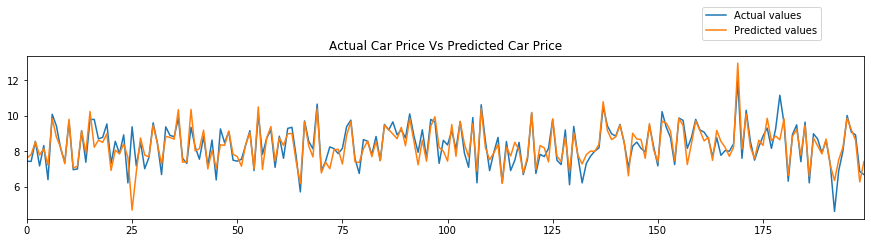

In [57]:
comp_woindex[:200].plot.line(figsize=(15,3),title='Actual Car Price Vs Predicted Car Price')
plt.legend(loc=6,bbox_to_anchor=([0.8,0.8,0.8,0.8]))

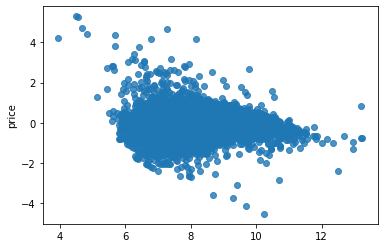

In [61]:
#residual plot analysis - residual=difference between predicted value and actual value

residual=y_test-pred_value

sns.regplot(x=pred_value,y=residual,scatter=True,fit_reg=False,data=pre_owned)